# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [42]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [18]:
data.shape

(4870, 65)

<div class="span5 alert alert-success">
<p>1) Since the variable 'call' only has two values, 1 and 0, we have a binomial distribution. We can test whether or not race has a significant impact on the rate of callbacks for resumes using the binomial test of statistical significance. 

The Central Limit Theorem can be applied since n>30 which tells us that with a large enough N, we can assume a standard normal probability distribution function.</p>

<p>2)
null hypothesis: race does not have a significant impact on the rate of callbacks for resumes</p>
<p>alternative hypothesis: race does have a significant impact on the rate of callbacks for resumes</p>
    
</div>

Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [109]:
from statsmodels.stats import weightstats as stests
import scipy.stats as stats

w = data[data.race=='w']
b = data[data.race=='b']
wr= sum(w.call)/len(w)
br = sum(b.call)/len(b)

sd_w = wr*(1-wr)
sd_b = br*(1-br)

diff = wr-br
sd_diff = np.sqrt((sd_w/len(w))+(sd_b/len(b)))

#critical value for a 95% confidence interval = 1.96

moe = sd_diff*1.96
print('margin of error:%f'%moe)

#calculate upper and lower bounds of 95% CI
upper = diff+moe
lower = diff - moe

print('95% '+'confidence interval: (%f,%f)'%(lower,upper))

#calculate the zscore
p = (sum(w.call)+sum(b.call))/len(data)
sd = np.sqrt((2*p*(1-p))/(len(data)/2))

z_score = (diff-0)/sd
pval = stats.norm.sf(abs(z_score))*2

print ('p-value: %f'%pval)

if pval>0.05:
    print ('Is the difference statistically significant at a 5% level? No.')
else:
    print ('Is the difference statistically significant at a 5% level? Yes.')

margin of error:0.015255
95% confidence interval: (0.016777,0.047288)
p-value: 0.000040
Is the difference statistically significant at a 5% level? Yes.


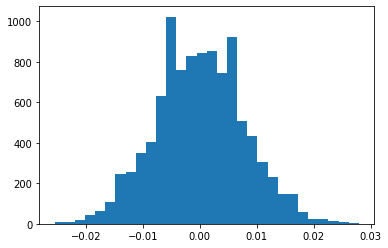

In [126]:
#Bootstrapping

%matplotlib inline
import matplotlib.pyplot as plt

called = data.call

def permutate_mean(data):
    perm = np.random.permutation(data)
    w_perm = perm[:len(w)]
    b_perm = perm[len(w):]
    return np.mean(w_perm)-np.mean(b_perm)


    
permutations = np.empty(10000)
for i in range(10000):
    permutations[i]=permutate_mean(called)

_=plt.hist(permutations,bins=30)
plt.show()

In [148]:
#check pvalue

p_val = (np.sum(np.abs(permutations)>=diff))/10000
print('p value: %.10f'%p_val)

m_e=1.96*(np.std(permutations))
av = np.mean(permutations)

up=av+m_e
low=av-m_e

print('95%'+' confidence interval: (%.10f,%.10f)'%(low,up))

if p_val>0.05:
    print ('Is the difference statistically significant at a 5% level? No.')
else:
    print ('Is the difference statistically significant at a 5% level? Yes.')

p value: 0.0000000000
95% confidence interval: (-0.0151290326,0.0153241866)
Is the difference statistically significant at a 5% level? Yes.


 <div class="span5 alert alert-success">
<p> 4) We see that the difference between the rate of callbacks for resumes among white-sounding and black-sounding names is statistically significant. This tells us that race does have an impact on the likelihood of getting a callback for your resume. This shines a light on the discrimination against black people in the job market. </p>
    
<p> 5) No, the analysis simply tells us that race is one of the factors that affects the likelihood of getting a callback for your resume. We did not study any of the other factors in this study. To see the effect of race/name on the likelihood of a callback compared to other features, we need to run a regression that takes other variables/features into account. </p>

</div>